

---

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the confidence interval -- the range of the number of votes which encapsulates 95% of the data (see the boxplot lectures for more information, and the yerr parameter of barcharts).

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

---

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm


np.random.seed(12345)

df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])

df['avg'] = df.mean(axis=1)
df['sampleStd'] = df.std(axis=1)
df['standardErr'] = df['sampleStd']/np.sqrt(3650)
df['margOfErr95'] = df['standardErr']*1.96 
df1 = df.copy()
df1 = df1.loc[:,'avg':'margOfErr95']
df1 = df1.iloc[:,[0,3]]
df1
print (list(df1.avg))

[34484.080606658303, 39975.673586966092, 37565.689949770524, 47798.504332995661]


<IPython.core.display.Javascript object>


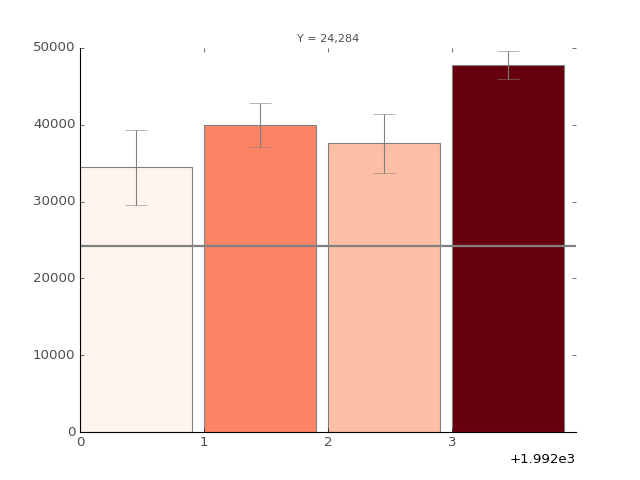

7

In [2]:
plt.bar(df1.index, df1['avg'], width=0.9, yerr=df['margOfErr95'], capsize=10, ecolor='grey', edgecolor='grey', color='lightgrey')
plt.xticks(df1.index, alpha=0.7) #adjust x to matchdates.
plt.yticks(alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


blues = cm.Blues
reds = cm.Reds

df2 = df1.copy()

def onclick(event):
    y = event.ydata
    df2['diff'] = y-df2['avg']
    df2['sign'] = df2['diff'].abs()/df2['diff']
    range1 = abs(df2['diff']).min(), abs(df2['diff']).max()
    range2 = 0.01,1
    df2['shade'] = df2['sign']*np.interp(df2['diff'].abs(), range1, range2)
    shade = list(df2['shade'])
 
    col = ['white' if x==0 else reds(abs(x))
           if x<0 else blues(abs(x)) for x in shade]
    # Plot
    plt.cla()
    plt.bar(df1.index, df1['avg'], width=0.9, 
            yerr=df['margOfErr95'], capsize=10,
            ecolor='grey', edgecolor='grey', color=col)
    plt.xticks(df1.index, alpha=0.7)
    plt.yticks(alpha=0.7)
    plt.axhline(y=y, color='grey', linewidth=2)
    plt.gca().set_title('Y = {0:,.0f}'.format(event.ydata), fontsize=10, alpha=0.7)

    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)


In [2]:
mpl.get_backend()

'nbAgg'